<a href="https://colab.research.google.com/github/Kiwicodepedia/Exercise2/blob/main/Excercise2_Andalucia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
from google.colab import files

# Subir archivos desde tu computadora
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# Decodificar el contenido del archivo
dataset = uploaded[file_name].decode("utf-8")

# Dividir en líneas, limpiar cada una y convertir a minúsculas
words = [line.strip().replace("\t", "").lower() for line in dataset.split("\n") if line.strip()]

# Guardar el archivo limpio (opcional)
with open("archivo_limpio.txt", "w", encoding="utf-8") as file:
    file.write("\n".join(words))

# Mostrar los nombres limpios
print(words)



Saving Municipios andalucia.txt to Municipios andalucia.txt
['aguadulce', 'alanis', 'albaida del aljarafe', 'alcala de guadaira', 'alcala del rio', 'alcolea del rio', 'la algaba', 'algamitas', 'almaden de la plata', 'almensilla', 'arahal', 'aznalcazar', 'aznalcollar', 'badolatosa', 'benacazon', 'bollullos de la mitacion', 'bormujos', 'brenes', 'burguillos', 'las cabezas de san juan', 'camas', 'la campana', 'cantillana', 'canada rosal', 'carmona', 'carrion de los cespedes', 'casariche', 'castilblanco de los arroyos', 'castilleja de guzman', 'castilleja de la cuesta', 'castilleja del campo', 'el castillo de las guardas', 'cazalla de la sierra', 'constantina', 'coria del rio', 'coripe', 'el coronil', 'los corrales', 'el cuervo de sevilla', 'dos hermanas', 'ecija', 'espartinas', 'estepa', 'fuentes de andalucia', 'el garrobo', 'gelves', 'gerena', 'gilena', 'gines', 'guadalcanal', 'guillena', 'herrera', 'huevar del aljarafe', 'isla mayor', 'la lantejuela', 'lebrija', 'lora de estepa', 'lora 

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: ' ', 2: '-', 3: 'a', 4: 'b', 5: 'c', 6: 'd', 7: 'e', 8: 'f', 9: 'g', 10: 'h', 11: 'i', 12: 'j', 13: 'l', 14: 'm', 15: 'n', 16: 'o', 17: 'p', 18: 'q', 19: 'r', 20: 's', 21: 't', 22: 'u', 23: 'v', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
print(stoi)

{' ': 1, '-': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'l': 13, 'm': 14, 'n': 15, 'o': 16, 'p': 17, 'q': 18, 'r': 19, 's': 20, 't': 21, 'u': 22, 'v': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([7223, 3]) torch.Size([7223])
torch.Size([905, 3]) torch.Size([905])
torch.Size([1027, 3]) torch.Size([1027])


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([9155, 3]), torch.int64, torch.Size([9155]), torch.int64)

In [ ]:
C = torch.randn((27, 2))
emb = C[X]
emb.shape


torch.Size([9155, 3, 2])

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
h.shape

torch.Size([72, 100])

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [ ]:
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([72, 27])

tensor([[ -4.2060, -11.1502,  -1.9486,  ...,  -3.4667, -23.0742,  -6.7505],
        [ -8.2857, -13.8254,  -7.0280,  ...,   3.6633, -12.4186, -10.4823],
        [ -7.2261,  -1.1820,  -5.5838,  ...,  -5.9488,   2.9997, -10.9865],
        ...,
        [  0.6486,  -4.2875,  -8.3575,  ...,   5.4648,   8.0437,  -9.5538],
        [-13.3864,  13.2507,   5.5607,  ..., -17.1327,  10.5557, -19.8027],
        [  0.7713,  -1.0767, -13.0952,  ...,   6.0986, -13.0178,  -6.9280]])

In [ ]:
prob[71].sum()

tensor(1.)

In [ ]:
loss = -prob[torch.arange(72), Y].log().mean()
loss

tensor(16.6430)

In [ ]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([7223, 3]), torch.Size([7223]))

In [317]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [318]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [319]:
for p in parameters:
  p.requires_grad = True


In [320]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [321]:
lri = []
lossi = []
stepi = []

for i in range(10000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.08 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

1.4642003774642944


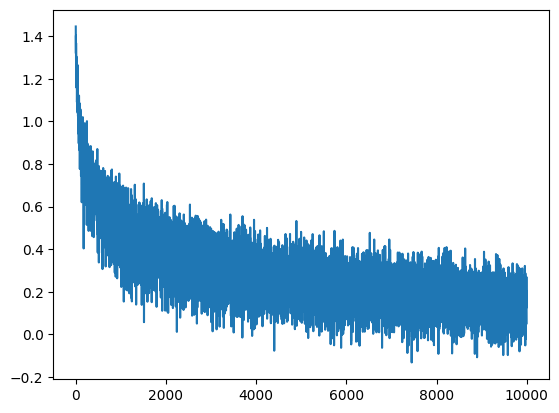

In [322]:
plt.plot(stepi, lossi)

In [323]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.4625, grad_fn=<NllLossBackward0>)

In [324]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.9851, grad_fn=<NllLossBackward0>)

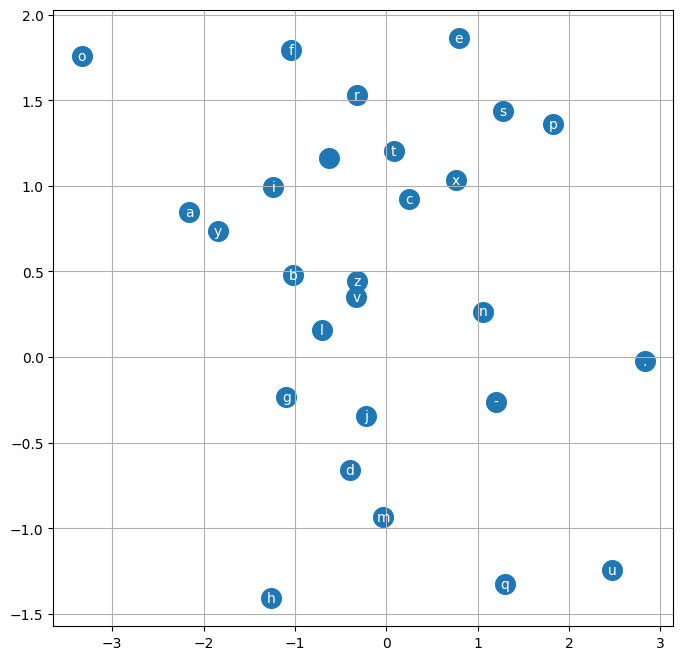

In [325]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [326]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [327]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

canillamedillas.
mondalcazchena.
che.
man.
guas.
bena.
gualoracejo.
canillos guada.
alfarco.
martos.
albunotlla.
humion.
huno.
santertos.
sabuc.
huelmache.
la real.
ayarco.
albuno.
guadiz.
